In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge , Lasso 

# dataset

In [2]:
df=pd.read_csv('Ecommerce Customers.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
columns=df.iloc[ : , : 3]

In [5]:
df_drop=df.drop(columns , axis=1 )

In [6]:
df_drop

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [7]:
x=df_drop.iloc[: , 0:4]

In [8]:
y=df_drop.iloc[: , 4:5]

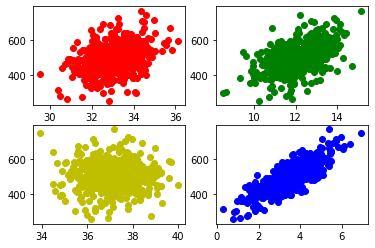

In [9]:
plt.subplot(2,2,1)
plt.scatter(x=df['Avg. Session Length'],y=df['Yearly Amount Spent'] , c='r')
plt.subplot(2,2,2)
plt.scatter(x=df['Time on App'],y=df['Yearly Amount Spent'] , c='g')
plt.subplot(2,2,3)
plt.scatter(x=df['Time on Website'],y=df['Yearly Amount Spent'] , c='y')
plt.subplot(2,2,4)
plt.scatter(x=df['Length of Membership'],y=df['Yearly Amount Spent'] , c='b')

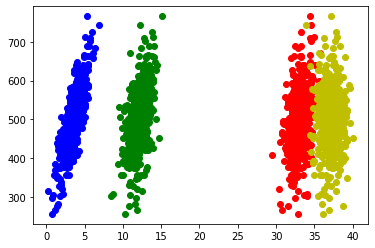

In [10]:
 
plt.scatter(x=df['Avg. Session Length'],y=df['Yearly Amount Spent'] , c='r') 
plt.scatter(x=df['Time on App'],y=df['Yearly Amount Spent'] , c='g') 
plt.scatter(x=df['Time on Website'],y=df['Yearly Amount Spent'] , c='y') 
plt.scatter(x=df['Length of Membership'],y=df['Yearly Amount Spent'] , c='b')

<AxesSubplot:>

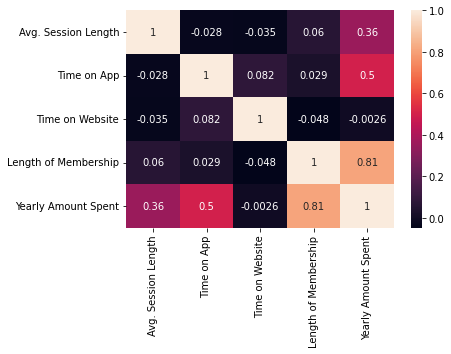

In [11]:
cor=df_drop.corr()
sns.heatmap(cor, annot=True)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y , test_size=0.3 ,random_state=51 )

In [13]:
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576
169,32.654622,11.052324,37.633009,4.717103
239,31.720770,11.752343,38.573605,5.023934
435,32.259973,14.132893,37.023479,3.762070
143,32.115119,11.919242,39.294043,1.443515
...,...,...,...,...
197,32.407148,13.808799,37.426769,5.039955
457,33.119954,12.953263,37.034280,3.472021
224,34.642670,11.866481,37.717771,4.003325
485,33.369381,12.222484,36.355235,3.447018


In [14]:
sc=StandardScaler()

In [15]:
sc.fit(x_train )
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)
sc

StandardScaler()

In [16]:
x_train_df=pd.DataFrame(x_train_sc,columns=['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'])
x_train_df.describe().round(2) 

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,350.00,350.00,350.00,350.00
mean,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-3.52,-3.56,-2.95,-3.28
25%,-0.69,-0.67,-0.71,-0.58
50%,0.04,-0.09,0.00,0.01
75%,0.66,0.72,0.66,0.55
max,3.09,3.10,2.80,3.38


In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [18]:
model=regr.fit(x_train_sc,y_train)

In [19]:
import pickle

# Save the model to a file
with open('ecommerce_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the StandardScaler to a file
with open('ecommerce_scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)
